## Twitter News detection

In [2]:
import os
from os.path import join
from dotenv import load_dotenv
from IPython.core.display import display, HTML
import json
from twython import Twython
import pandas as pd
import geocoder
import os

In [83]:
press=pd.read_csv("/Users/estefaniavidalbouzon/code/EstefaniaVB/LexAI/LexAI/raw_data/press.csv", delimiter=";")

In [105]:
meps=pd.read_csv("/Users/estefaniavidalbouzon/code/EstefaniaVB/LexAI/LexAI/raw_data/meps.csv", delimiter=",")

In [109]:
press.head()

,MEDIA,TWITTER USERNAME
0,BBC News,BBCNews
1,Guardian,guardian
2,ORF News,ORFBreakingNews
3,Krone Zeitung,krone_at
4,Het Laatste Nieuws,HLN


In [112]:
meps.head()

,Unnamed: 0,name,country,eu_group,national_group,twitter,facebook,instagram,linkedin,email,Website,website,e-mail
0,197490,Magdalena Adamowicz,Poland,Group of the European People's Party (Christia...,Independent,Adamowicz_Magda,adamowicz.magdalena,adamowicz_magda,NaN,magdalena.adamowicz@europarl.europa.eu,https://adamowiczmagdalena.pl,NaN,NaN
1,189525,Asim Ademov,Bulgaria,Group of the European People's Party (Christia...,Citizens for European Development of Bulgaria,AdemovAsim,AdemovAsim,ademovasim,NaN,asim.ademov@europarl.europa.eu,http://asim-ademov.eu/,NaN,NaN
2,124831,Isabella Adinolfi,Italy,Group of the European People's Party (Christia...,Forza Italia,Isa_Adinolfi,NaN,NaN,NaN,isabella.adinolfi@europarl.europa.eu,NaN,NaN,NaN
3,197826,Matteo Adinolfi,Italy,Identity and Democracy Group,Lega,NaN,MatteoAdinolfiLega,NaN,NaN,matteo.adinolfi@europarl.europa.eu,NaN,NaN,NaN
4,197403,Alex Agius Saliba,Malta,Group of the Progressive Alliance of Socialist...,Partit Laburista,NaN,alexagiussaliba,NaN,NaN,alex.agiussaliba@europarl.europa.eu,NaN,NaN,NaN


### Credentials and path

In [3]:
#We need to be located on the project folder
pwd ="/Users/estefaniavidalbouzon/code/EstefaniaVB/LexAI/LexAI/"

In [4]:
env_path = join(pwd,'.env') # ../.env
load_dotenv(dotenv_path=env_path)

True

In [5]:
inv = load_dotenv(dotenv_path=env_path)

In [6]:
#CREDENTIALS

CONSUMER_KEY = os.getenv('CONSUMER_KEY')
CONSUMER_SECRET = os.getenv("CONSUMER_SECRET")
ACCESS_TOKEN = os.getenv("ACCESS_TOKEN")
ACCESS_SECRET = os.getenv("ACCESS_SECRET")

In [7]:
python_tweets = Twython(CONSUMER_KEY, CONSUMER_SECRET)

### New outlets and politicians twitter data

In [115]:
news = press["TWITTER USERNAME "]
politicians = meps["twitter"]

In [131]:
politicians

0      Adamowicz_Magda
1           AdemovAsim
2         Isa_Adinolfi
3                  NaN
4                  NaN
            ...       
700            zoidoji
701                NaN
702            ZovkoEU
703                NaN
704                NaN
Name: twitter, Length: 705, dtype: object

In [129]:
len(news)

58

#### Twitter limitation

Limit of 100,000 requests per day to the /statuses/user_timeline endpoint, in addition to existing user-level and app-level rate limits. This limit is applied on a per-application basis, meaning that a single developer app can make up to 100,000 calls during any single 24-hour period.

This method can only return up to 3,200 of a user's most recent Tweets. Native retweets of other statuses by the user is included in this total, regardless of whether include_rts is set to false when requesting this resource.

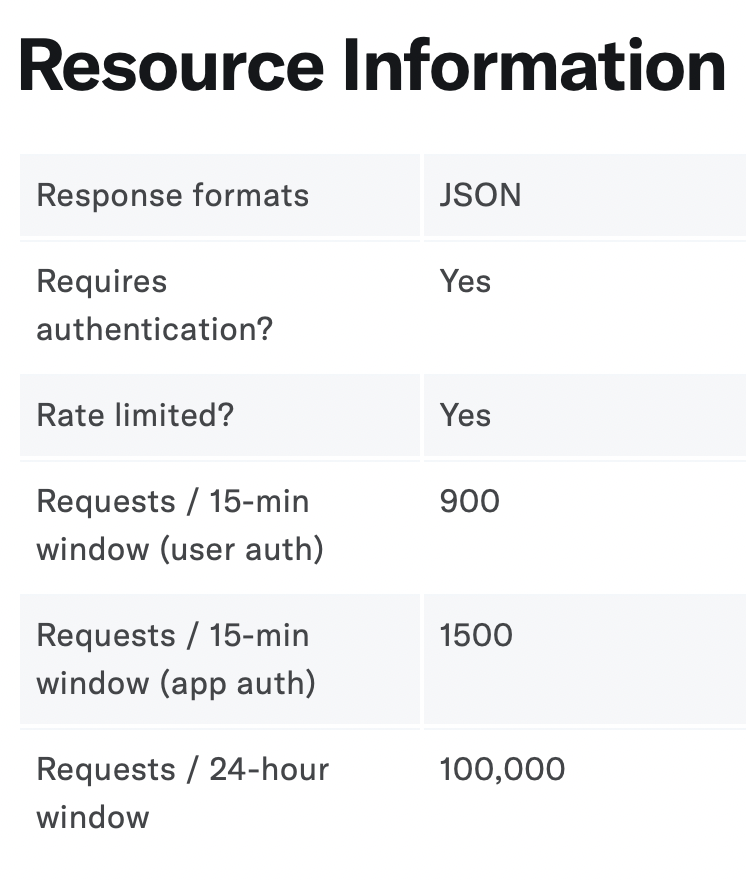

### Retrieve the timeline of the Newspaper

- We can just retrieve 200 tweets/request
- 900 tweets 15 min
- 100000 in 24h

We can make 4 request 200 tweets + 1 request 100 tweets each 15 minutes

In [132]:
import time

In [137]:
news_tweets=[]

In [ ]:
#requesting the tweets from the news

In [138]:
time.sleep(60*15)
for outlet in news:
    news_tweets.append(python_tweets.get_user_timeline(screen_name=outlet, count=3))

TwythonError: Twitter API returned a 404 (Not Found), Sorry, that page does not exist.

In [142]:
news_tweets
news_data = pd.DataFrame(news_tweets)


,0,1,2
0,{'created_at': 'Thu Jun 03 12:59:49 +0000 2021...,{'created_at': 'Thu Jun 03 12:42:03 +0000 2021...,{'created_at': 'Thu Jun 03 12:39:05 +0000 2021...
1,{'created_at': 'Thu Jun 03 13:05:52 +0000 2021...,{'created_at': 'Thu Jun 03 13:00:39 +0000 2021...,{'created_at': 'Thu Jun 03 12:55:10 +0000 2021...
2,{'created_at': 'Wed Jun 02 19:34:18 +0000 2021...,{'created_at': 'Wed Jun 02 09:54:13 +0000 2021...,{'created_at': 'Tue Jun 01 14:47:58 +0000 2021...
3,{'created_at': 'Thu Jun 03 13:00:00 +0000 2021...,{'created_at': 'Thu Jun 03 12:30:01 +0000 2021...,{'created_at': 'Thu Jun 03 11:45:52 +0000 2021...
4,{'created_at': 'Tue Dec 06 01:46:46 +0000 2016...,{'created_at': 'Sat Nov 26 01:00:50 +0000 2016...,{'created_at': 'Fri Nov 25 01:49:13 +0000 2016...
5,{'created_at': 'Thu Nov 01 16:14:15 +0000 2018...,{'created_at': 'Thu Nov 01 13:54:39 +0000 2018...,{'created_at': 'Thu Nov 01 12:16:31 +0000 2018...
6,{'created_at': 'Thu Apr 10 10:25:41 +0000 2014...,{'created_at': 'Tue Apr 08 13:06:45 +0000 2014...,{'created_at': 'Tue Apr 08 13:05:44 +0000 2014...
7,{'created_at': 'Thu Jun 03 13:00:02 +0000 2021...,{'created_at': 'Thu Jun 03 12:40:00 +0000 2021...,{'created_at': 'Thu Jun 03 12:20:00 +0000 2021...
8,{'created_at': 'Thu Mar 12 16:53:40 +0000 2015...,{'created_at': 'Tue Mar 10 14:03:33 +0000 2015...,{'created_at': 'Sun Feb 01 13:31:33 +0000 2015...
9,{'created_at': 'Thu Jun 03 13:12:04 +0000 2021...,{'created_at': 'Thu Jun 03 13:02:00 +0000 2021...,{'created_at': 'Thu Jun 03 12:33:53 +0000 2021...


In [163]:
data_new_filtered=[]

for column in news_data:
    for row in news_data[column]:
        id_new = row["id"]
        text = row["text"]
        try:
            url = row["entities"]["urls"][0]["url"]
        except:
            url =""
        try:
            expanded_url = row["entities"]["urls"][0]["expanded_url"]
        except:
            expanded_url =""
        name = row["user"]["name"]
        location = row["user"]["location"]
        followers_count = row["user"]["followers_count"]
        friends_count = row["user"]["friends_count"]
        listed_count = row["user"]["listed_count"]
        favourites_count = row["user"]["favourites_count"]
        profile_image_url = row["user"]["profile_image_url"]
        retweet_count= row["retweet_count"]
        source = row["source"]
        created_at = row["created_at"]
        
        data_new_filtered.append({"id_new":id_new,"text":text,"url":url,"expanded_url":expanded_url,"name":name,"location":location,"followers_count":followers_count,"friends_count":friends_count,"listed_count":listed_count,"favourites_count":favourites_count,"profile_image_url":profile_image_url,"retweet_count":retweet_count,"source":source,"created_at":created_at})
        


In [ ]:
#requesting the tweets from the politicians

In [173]:
politicians[:2]

0    Adamowicz_Magda
1         AdemovAsim
Name: twitter, dtype: object

In [174]:
meps_tweets = []
time.sleep(60*15)
for politic in politicians[:2]:
    print(f"Downloading tweets from: ...{politic}")
    meps_tweets.append(python_tweets.get_user_timeline(screen_name=politic, count=1))

KeyboardInterrupt: 

In [140]:
meps_tweets = pd.DataFrame(meps_tweets)

NameError: name 'meps_tweets' is not defined

### Retrieve the timeline of the politician

In [ ]:
data_politicians_filtered=[]

for column in meps_tweets:
    for row in meps_tweets[column]:
        id_new = row["id"]
        text = row["text"]
        try:
            url = row["entities"]["urls"][0]["url"]
        except:
            url =""
        try:
            expanded_url = row["entities"]["urls"][0]["expanded_url"]
        except:
            expanded_url =""
        name = row["user"]["name"]
        location = row["user"]["location"]
        followers_count = row["user"]["followers_count"]
        friends_count = row["user"]["friends_count"]
        listed_count = row["user"]["listed_count"]
        favourites_count = row["user"]["favourites_count"]
        profile_image_url = row["user"]["profile_image_url"]
        retweet_count= row["retweet_count"]
        source = row["source"]
        created_at = row["created_at"]
        
        data_politicians_filtered.append({"id_new":id_new,"text":text,"url":url,"expanded_url":expanded_url,"name":name,"location":location,"followers_count":followers_count,"friends_count":friends_count,"listed_count":listed_count,"favourites_count":favourites_count,"profile_image_url":profile_image_url,"retweet_count":retweet_count,"source":source,"created_at":created_at})

### Collected tweets

In [166]:
news_tweets = pd.DataFrame(data_new_filtered)

In [168]:
news_tweets.shape

(129, 14)

In [169]:
news_tweets.head()

,id_new,text,url,expanded_url,name,location,followers_count,friends_count,listed_count,favourites_count,profile_image_url,retweet_count,source,created_at
0,1400437061778354176,Portugal to be taken off England's travel gree...,https://t.co/wEzAAmPqUx,https://bbc.in/3uRgcGe,BBC News (UK),London,12311039,93,45632,45,http://pbs.twimg.com/profile_images/1150718511...,49,"<a href=""http://www.socialflow.com"" rel=""nofol...",Thu Jun 03 12:59:49 +0000 2021
1,1400438584646242306,Albuquerque mayoral candidate interrupted by d...,https://t.co/bcOYTrrrkJ,https://www.theguardian.com/us-news/video/2021...,The Guardian,London,9744081,1072,65546,137,http://pbs.twimg.com/profile_images/1175141826...,2,"<a href=""https://www.echobox.com"" rel=""nofollo...",Thu Jun 03 13:05:52 +0000 2021
2,1400173952798969862,In Israel steht die Ära Netanyahu vor ihrem vo...,https://t.co/4b7iuDeHOb,https://twitter.com/i/web/status/1400173952798...,ORF Breaking News,,115809,1,614,1,http://pbs.twimg.com/profile_images/3788000002...,9,"<a href=""https://mobile.twitter.com"" rel=""nofo...",Wed Jun 02 19:34:18 +0000 2021
3,1400437109782024192,Kostenloser Anreiz: Rotes Kreuz bietet in Wien...,https://t.co/NZ2JUxbKpI,https://twitter.com/i/web/status/1400437109782...,Kronen Zeitung,"Vienna, Austria",64635,44,500,785,http://pbs.twimg.com/profile_images/1080451682...,0,"<a href=""https://about.twitter.com/products/tw...",Thu Jun 03 13:00:00 +0000 2021
4,805951584144224257,voorpagina - Elke vier dagen valse bommelding\...,https://t.co/2d3IZnfoOR,http://hln.be/digitalekrant,Het Laatste Nieuws,België,20735,4,443,26,http://pbs.twimg.com/profile_images/521982636/...,3,"<a href=""https://about.twitter.com/products/tw...",Tue Dec 06 01:46:46 +0000 2016


### Displaying tweets

In [77]:
display(HTML('<blockquote class="twitter-tweet" data-dnt="true"><p width="100" theme="dark" cards="hidden" lang="es" dir="ltr">“It is without historical parallel.” Why America’s economic recovery is like no other. <a href="https://t.co/IwsiI3VVFX">https://t.co/IwsiI3VVFX</a> a través de <a href="https://twitter.com/WSJ?ref_src=twsrc%5Etfw">@WSJ</a></p>&mdash; Pablo Ximénez de Sandoval (@pximenez) <a href="https://twitter.com/pximenez/status/1400190075468668936?ref_src=twsrc%5Etfw">June 2, 2021</a></blockquote> <script async src="https://platform.twitter.com/widgets.js" charset="utf-8"></script>'))


In [334]:
tweet = display(HTML(f'<div class="twitter-feed">\
   <div class="col-md-4"></div>\
   <div class="container">\
      <div class="col-md-4">\
         <div class="panel panel-danger">\
            <div class="panel-heading">\
            </div>\
            <div class="panel-body">\
               <div class="twitter-timeline" data-width="100%"><p lang="en" dir="ltr">{text}<a href={url}>{url2}</a></p>&mdash; {name} (@{profile}) <a href={expanded_url}>{date}</a><hide_thread=false></blockquote> </div>\
         </div>\
      </div>\
   </div>\
   </div class="col-md-4">\
   </div>\
</div>\
<script async src="//platform.twitter.com/widgets.js" charset="utf-8"></script>'))


In [326]:
tweet = display(HTML(f'<figure class="op-interactive">\
    <blockquote class="twitter-tweet"><p lang="en" dir="ltr">{text}<a href={url}>{url2}</a></p>&mdash; {name} (@{profile}) <a href={expanded_url}>{date}</a><<hide_thread=true><data-cards="hidden"></blockquote> <script async src="https://platform.twitter.com/widgets.js" charset="utf-8"></script>\
</figure>'))

In [311]:
url
expanded_url
oembed_url

'https://publish.twitter.com/oembed?url=https%3A%2F%2Ftwitter.com%2Fel_pais%2Fstatus%2F1400195961037766659'

### Displaying tweets

In [69]:
import requests
from urllib.parse import urlencode

#url = 'https://twitter.com/jack/status/20'

query_string = urlencode({'url': "https://twitter.com/i/web/status/1400384512312459264"}) # 'omit_script': 1
oembed_url = f"https://publish.twitter.com/oembed?{query_string}"

r = requests.get(oembed_url, params={"widget_type":"grid"})
if r.status_code == 200:
    result = r.json()
    html = result['html'].strip()

In [71]:
display(HTML(html))

<Response [404]>

In [72]:
oembed_url

'https://publish.twitter.com/oembed?url=https%3A%2F%2Ftwitter.com%2Fi%2Fweb%2Fstatus%2F1400384512312459264'